<a href="https://colab.research.google.com/github/SumitMohan/Covid-19-Third-Wave-Prediction/blob/main/Covid_19_Third_Wave_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyDrive
!pip install gensim
!pip install pyldavis
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import nltk
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pyldavis

In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import json
import re
import gzip
import spacy

import gensim
from gensim import corpora

import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/News.csv')
print(df.head(5))

                                                                                                                                                                                                      Text
0  Amid speculations of Covid  s 3rd wave, experts have said that the 2nd wave is not yet over and these small spikes may lead to a   blunted   third wave of the pandemic in the country.The predicted...
1   The wave or cycle is of academic significance only. If cases are rising, it does not matter whether that is a continuation of the second wave or the start of the next wave,  Delhi-based physician...
2  Reacting to this, joint secretary of the Union health ministry Lav Agarwal has said that the second wave is still not over in India as around 40,000 new Covid 19 infections are being recorded ever...
3  There have been several projections and opinions regarding the third wave in India. Here is all we know:Mathematically, the timing of the third wave in India can be predicted and July-A

In [ ]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)
    
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [ ]:

df.shape

(206, 1)

In [ ]:
print(df.head())

                                                                                                                                                                                                      Text
0  Amid speculations of Covid  s 3rd wave, experts have said that the 2nd wave is not yet over and these small spikes may lead to a   blunted   third wave of the pandemic in the country.The predicted...
1   The wave or cycle is of academic significance only. If cases are rising, it does not matter whether that is a continuation of the second wave or the start of the next wave,  Delhi-based physician...
2  Reacting to this, joint secretary of the Union health ministry Lav Agarwal has said that the second wave is still not over in India as around 40,000 new Covid 19 infections are being recorded ever...
3  There have been several projections and opinions regarding the third wave in India. Here is all we know:Mathematically, the timing of the third wave in India can be predicted and July-A

In [ ]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(15,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

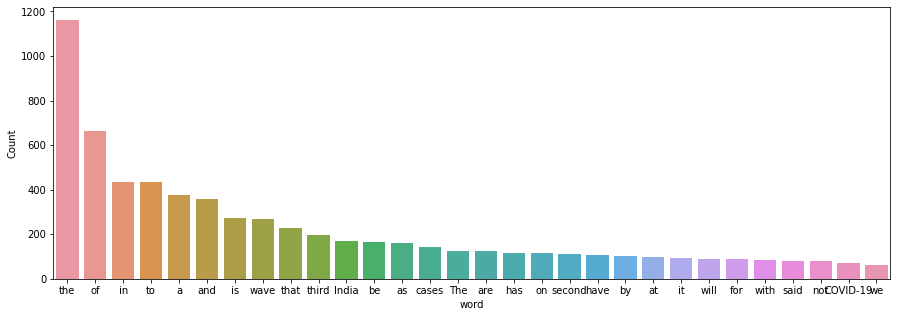

In [ ]:
freq_words(df['Text'])

In [ ]:
# replace "n't" with " not"
df['Text'] = df['Text'].str.replace("n\'t", " not")

# remove unwanted characters, numbers and symbols
df['Text'] = df['Text'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
# function to remove stopwords
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

In [ ]:
# remove short words (length < 3)
df['Text'] = df['Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['Text']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

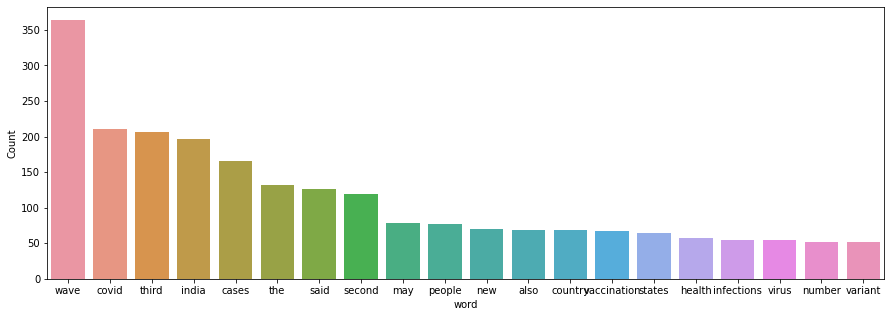

In [ ]:
freq_words(reviews, 20)

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [ ]:
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [ ]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['the', 'wave', 'cycle', 'academic', 'significance', 'cases', 'rising', 'matter', 'whether', 'continuation', 'second', 'wave', 'start', 'next', 'wave', 'delhi', 'based', 'physician', 'epidemiologist', 'health', 'systems', 'expert', 'chandrakant', 'lahariya', 'told', 'pti', 'researchers', 'iit', 'hyderabad', 'kanpur', 'predicted', 'second', 'wave', 'covid', 'pandemic', 'said', 'third', 'wave', 'may', 'peak', 'october']


In [ ]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['the', 'wave', 'cycle', 'academic', 'significance', 'cases', 'rising', 'matter', 'whether', 'continuation', 'second', 'wave', 'start', 'next', 'wave', 'delhi', 'based', 'physician', 'epidemiologist', 'health', 'systems', 'expert', 'chandrakant', 'lahariya', 'told', 'pti', 'researchers', 'iit', 'hyderabad', 'kanpur', 'predicted', 'second', 'wave', 'covid', 'pandemic', 'said', 'third', 'wave', 'may', 'peak', 'october']


41

In [ ]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

['wave', 'cycle', 'academic', 'significance', 'case', 'continuation', 'second', 'wave', 'start', 'next', 'researcher', 'hyderabad', 'kanpur', 'second', 'wave', 'pandemic', 'third', 'wave']


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

In [ ]:
print(reviews_2[1])
len(reviews_2[1])

['wave', 'cycle', 'academic', 'significance', 'case', 'continuation', 'second', 'wave', 'start', 'next', 'researcher', 'hyderabad', 'kanpur', 'second', 'wave', 'pandemic', 'third', 'wave']


18

In [ ]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'based',
 'cases',
 'chandrakant',
 'covid',
 'delhi',
 'epidemiologist',
 'expert',
 'health',
 'iit',
 'lahariya',
 'matter',
 'may',
 'october',
 'peak',
 'physician',
 'predicted',
 'pti',
 'researchers',
 'rising',
 'said',
 'systems',
 'the',
 'told',
 'whether'}

In [ ]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
df['reviews'] = reviews_3

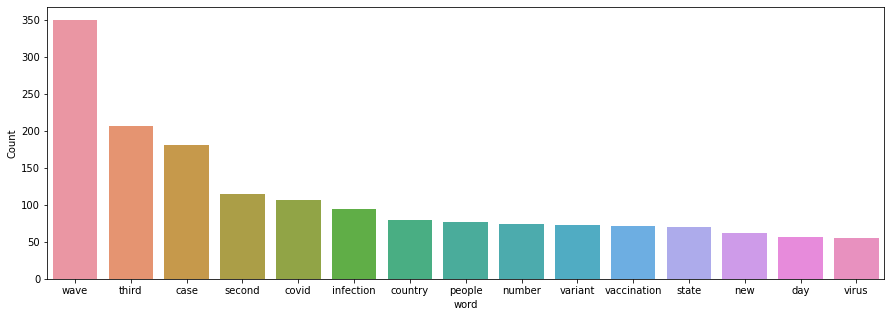

In [ ]:
freq_words(df['reviews'], 15)

In [ ]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(reviews_2)

In [ ]:
# Convert list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [ ]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=5, 
                random_state=100,
                chunksize=50,
                passes=50)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
lda_model.print_topics()

[(0,
  '0.084*"case" + 0.044*"covid" + 0.029*"number" + 0.028*"hour" + 0.025*"high" + 0.023*"pandemic" + 0.022*"active" + 0.019*"daily" + 0.019*"day" + 0.018*"vaccination"'),
 (1,
  '0.054*"variant" + 0.038*"wave" + 0.029*"vaccination" + 0.026*"third" + 0.026*"new" + 0.014*"coverage" + 0.014*"study" + 0.012*"immunity" + 0.012*"country" + 0.010*"measure"'),
 (2,
  '0.083*"wave" + 0.061*"case" + 0.057*"third" + 0.036*"covid" + 0.028*"model" + 0.028*"researcher" + 0.021*"country" + 0.020*"number" + 0.019*"mathematical" + 0.016*"daily"'),
 (3,
  '0.040*"scenario" + 0.036*"people" + 0.033*"case" + 0.033*"day" + 0.031*"infection" + 0.024*"rise" + 0.024*"bad" + 0.022*"good" + 0.017*"vaccination" + 0.016*"vaccine"'),
 (4,
  '0.086*"wave" + 0.053*"third" + 0.045*"second" + 0.025*"state" + 0.022*"case" + 0.021*"infection" + 0.020*"expert" + 0.016*"virus" + 0.015*"number" + 0.015*"covid"')]

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.119328  0.061916       1        1  33.858845
2      0.025435  0.136541       2        1  19.729390
1      0.133050 -0.078068       3        1  19.293414
0     -0.214759  0.053164       4        1  16.975749
3     -0.063054 -0.173553       5        1  10.142601, topic_info=           Term        Freq       Total Category  logprob  loglift
2          case  197.000000  197.000000  Default  30.0000  30.0000
56      variant   79.000000   79.000000  Default  29.0000  29.0000
26         wave  288.000000  288.000000  Default  28.0000  28.0000
24        third  182.000000  182.000000  Default  27.0000  27.0000
76     scenario   27.000000   27.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
118       month    4.252020   26.433962   Topic5  -4.8379   0.4612
26         wave    7.712529  288.252873   Topic5  -4.2425  -1.3326
167        week    2.913326   15.024502   Topic5  -5.2160   0.6480
33   researcher    2.989735   37.455492   Topic5  -5.1902  -0.2395
17       second    3.045413  104.692927   Topic5  -5.1717  -1.2490

[282 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
105       3  0.879153      able
140       4  0.941406    active
865       2  0.695263  affected
884       2  0.938931     alert
456       1  0.872525  antibody
...     ...       ...       ...
167       3  0.266232      week
167       5  0.199674      week
258       5  0.804417    weekly
1025      5  0.867180   witness
94        2  0.868645     world

[305 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 1, 4])

In [ ]:
# Print the Keyword in the 10 topics
lda_model.print_topics()

[(0,
  '0.084*"case" + 0.044*"covid" + 0.029*"number" + 0.028*"hour" + 0.025*"high" + 0.023*"pandemic" + 0.022*"active" + 0.019*"daily" + 0.019*"day" + 0.018*"vaccination"'),
 (1,
  '0.054*"variant" + 0.038*"wave" + 0.029*"vaccination" + 0.026*"third" + 0.026*"new" + 0.014*"coverage" + 0.014*"study" + 0.012*"immunity" + 0.012*"country" + 0.010*"measure"'),
 (2,
  '0.083*"wave" + 0.061*"case" + 0.057*"third" + 0.036*"covid" + 0.028*"model" + 0.028*"researcher" + 0.021*"country" + 0.020*"number" + 0.019*"mathematical" + 0.016*"daily"'),
 (3,
  '0.040*"scenario" + 0.036*"people" + 0.033*"case" + 0.033*"day" + 0.031*"infection" + 0.024*"rise" + 0.024*"bad" + 0.022*"good" + 0.017*"vaccination" + 0.016*"vaccine"'),
 (4,
  '0.086*"wave" + 0.053*"third" + 0.045*"second" + 0.025*"state" + 0.022*"case" + 0.021*"infection" + 0.020*"expert" + 0.016*"virus" + 0.015*"number" + 0.015*"covid"')]

In [ ]:
lda_model

In [ ]:
#creating wordcloud 
from wordcloud import WordCloud  
WordCloud
from  nltk.corpus import stopwords #for stopwords 

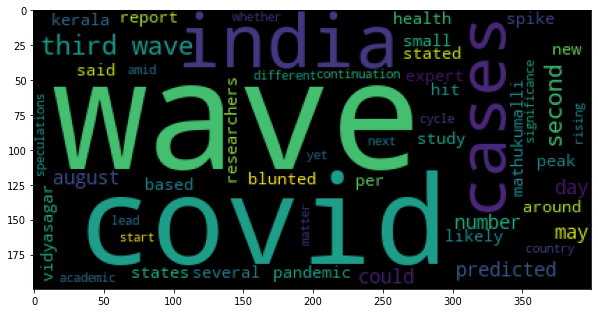

In [ ]:
cloud  = WordCloud(max_words= 50, stopwords=stopwords.words("english") ).generate(str(tokenized_reviews) )
plt.figure(figsize= (10 , 10)) 
plt.imshow(cloud)